<a href="https://colab.research.google.com/github/ashishpatel26/Ganpat-University-Data-Science/blob/main/Lecture_2_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

![](https://datascience.foundation/img/pdf_images/understanding_of_linear_regression_with_python_1.png)

### 1.Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
np.random.seed(2021) # for choose same data for Model training

### 2.Read the data

In [2]:
data = pd.read_csv('https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### 3.Mapping with X and Y format
* X1 => Gender
* X2 => Height
* Y => Weight

### 4.Number of Rows and Columns


In [3]:
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows: 10000
Number of Columns: 3


### 5.Check the data types of Features

In [4]:
data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

### 6.Basic Statistics Checking

In [5]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


### 7.Basic Data Exploration and Normalization Checking

0.04936908937689032


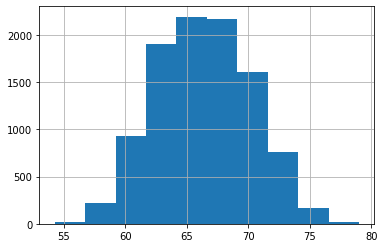

In [6]:
data["Height"].hist()
print(data["Height"].skew())

0.03295450444592437


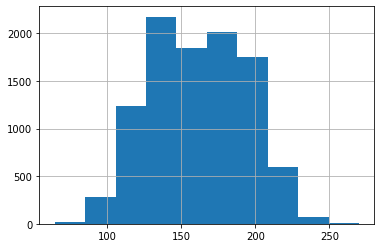

In [7]:
data["Weight"].hist()
print(data["Weight"].skew())

### 8.Missing value checking

In [8]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

### 9.Check the Correlation

In [9]:
data.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


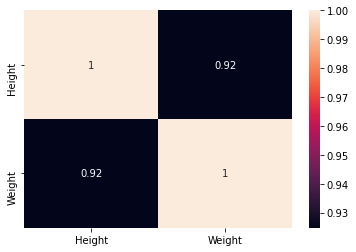

In [10]:
sns.heatmap(data.corr(), annot=True)

### 10.X and Y Seperate

In [11]:
X = data["Height"].values.reshape(-1,1)
y = data["Weight"].values

In [12]:
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
for i in [X_train, X_test, y_train, y_test]:
  print(i.shape)

(8000, 1)
(2000, 1)
(8000,)
(2000,)


### 11.Simple Linear Regresssion

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train) # Model Training 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lr.score(X_train,y_train)

0.8545053200432668

In [18]:
lr.coef_

array([7.70218561])

In [19]:
lr.intercept_

-349.7878205824451

### 12.Model Prediction

In [20]:
y_pred = lr.predict(X_test)

In [21]:
y_pred

array([179.25399046, 180.34848321, 161.62288801, ..., 129.20288223,
       166.78470522, 101.81227499])

In [22]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

### 13.Regression Plot predicted by Model

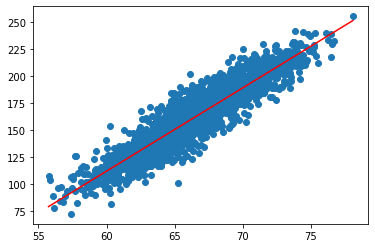

In [23]:
plt.scatter(X_test, y_test) 
plt.plot([min(X_test), max(X_test)], [min(y_pred), max(y_pred)], color='red')  # regression line
plt.show()

### 13.Model Evaluation

In [24]:
rmse(y_test, y_pred)

12.206699151878908

In [25]:
#display adjusted R-squared
1 - (1-lr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

0.8544871286604265

In [26]:
from sklearn.metrics import *

In [27]:
mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(9.691933801884572, 149.00350418448127, 0.8577317777038499)

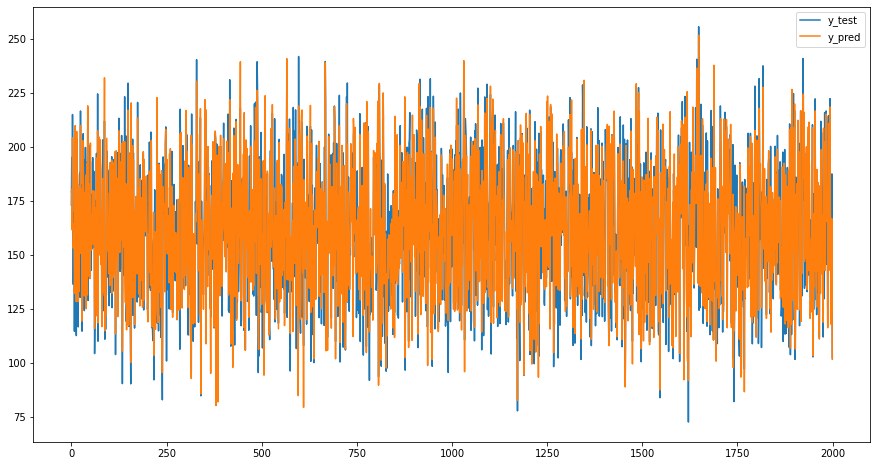

In [28]:
plt.figure(figsize=(15,8))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['y_test', 'y_pred'])
plt.show()

# Multiple Linear Regression
![](https://miro.medium.com/max/1662/1*39FkA9sgT6E_txFT_KANjw.png)

### Download Dataset

In [29]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

--2021-04-05 04:22:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K   514KB/s    in 0.5s    

2021-04-05 04:22:26 (514 KB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]



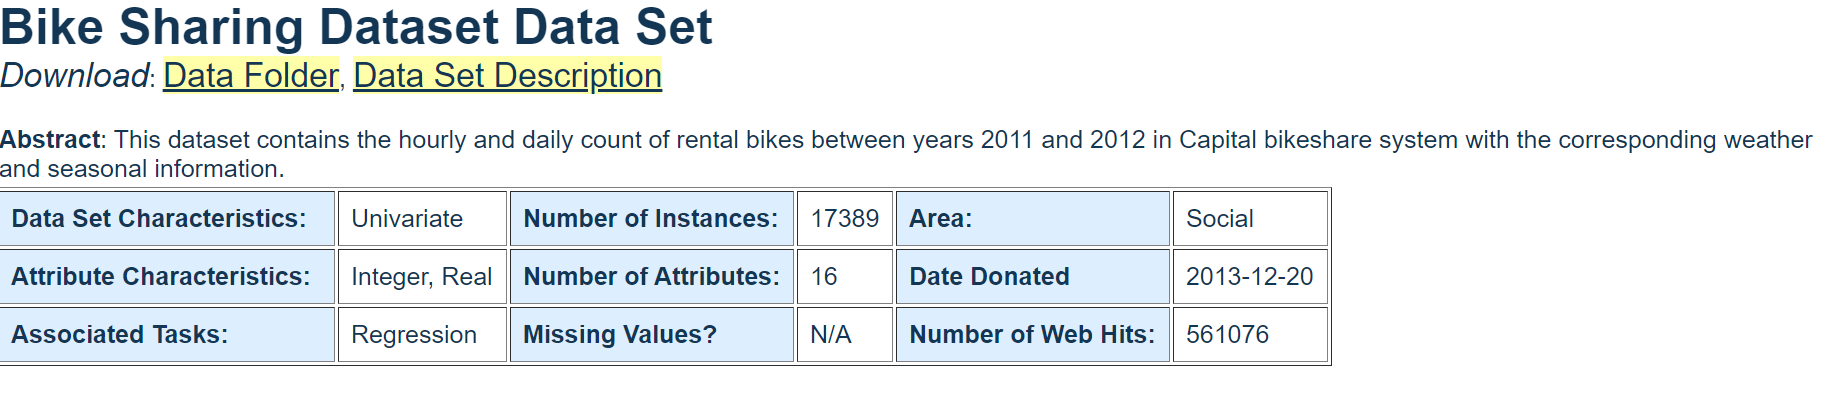

### **Data Set Information:**

* Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

* Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

> **Attribute Information:**

* Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [30]:
import shutil
shutil.unpack_archive("/content/Bike-Sharing-Dataset.zip", ".")

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression 

In [32]:
hour = pd.read_csv("/content/hour.csv")
day = pd.read_csv("/content/day.csv")

In [33]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [35]:
print("Rows :",day.shape[0])
print("Columns :", day.shape[1])

Rows : 731
Columns : 16


In [36]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [37]:
day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

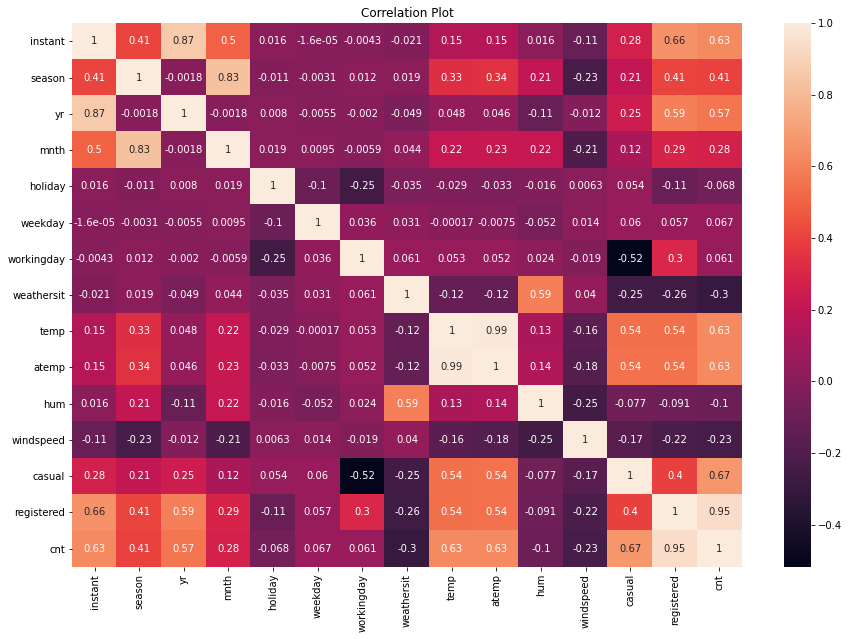

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(day.corr(), annot=True)
plt.title("Correlation Plot")
plt.show()

In [39]:
corr_cols = ['instant','yr','temp', 'atemp', 'casual', 'registered']
X = day[corr_cols]
y = day['cnt']

In [40]:
X.shape

(731, 6)

In [41]:
y.shape

(731,)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for i in [X_train, X_test, y_train, y_test]:
  print(i.shape)

(584, 6)
(147, 6)
(584,)
(147,)


In [43]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
print("Training R Score : ",mlr.score(X_train, y_train))
print("Testing R Score: ", mlr.score(X_test, y_test))
print("RMSE :", rmse(y_test, mlr.predict(X_test)))

Training R Score :  1.0
Testing R Score:  1.0
RMSE : 1.6616567233391897e-12


In [44]:
y_pred = mlr.predict(X_test)

In [45]:
result = pd.DataFrame()
result["Y_Actual"] = y_test
result["Y_pred"] = y_pred
result

,Y_Actual,Y_pred
703,6606,6606.0
33,1550,1550.0
300,3747,3747.0
456,6041,6041.0
633,7538,7538.0
...,...,...
70,2132,2132.0
192,4258,4258.0
328,2792,2792.0
165,5180,5180.0


### Result Analysis on X vs Ypred

[[1.         0.63582213]
 [0.63582213 1.        ]]


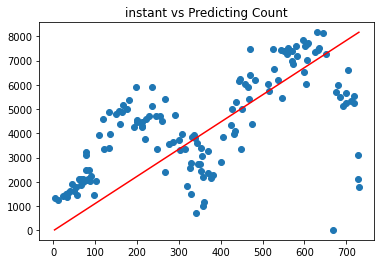

[[1.         0.62211024]
 [0.62211024 1.        ]]


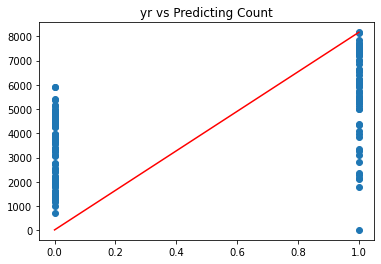

[[1.        0.6388457]
 [0.6388457 1.       ]]


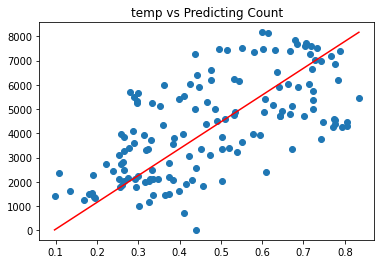

[[1.         0.64529942]
 [0.64529942 1.        ]]


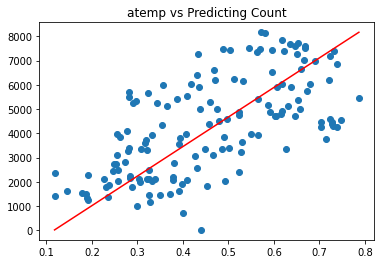

[[1.         0.66337518]
 [0.66337518 1.        ]]


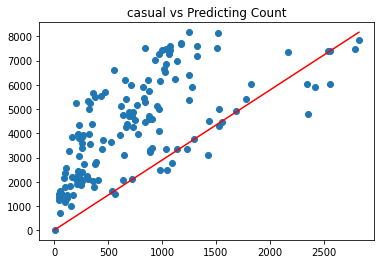

[[1.         0.95938343]
 [0.95938343 1.        ]]


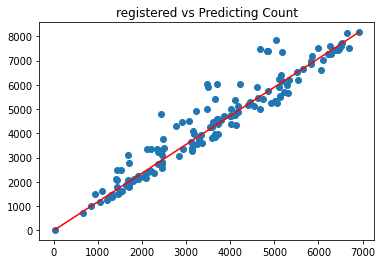

In [46]:
for i in X_test.columns.tolist():
  plt.scatter(X_test[i], y_test) 
  print(np.corrcoef(X_test[i], y_pred))
  plt.plot([min(X_test[i]), max(X_test[i])], [min(y_pred), max(y_pred)], color='red')  # regression line
  plt.title(f"{i} vs Predicting Count")
  plt.show()

In [47]:
weights = mlr.coef_.tolist()
cols = X.columns

In [48]:
print("Y(cnt) = ", end = " " )
for x, w in zip(cols, weights):
  print(f"({x}) * {w}", end=" + ")
print(f"({mlr.intercept_})", end=" ")

Y(cnt) =  (instant) * -9.864707531115842e-16 + (yr) * 4.68070027181966e-13 + (temp) * 1.284896830860277e-12 + (atemp) * 5.137537954330281e-12 + (casual) * 1.0 + (registered) * 1.0000000000000004 + (-4.547473508864641e-12) 